[*********************100%***********************]  1 of 1 completed


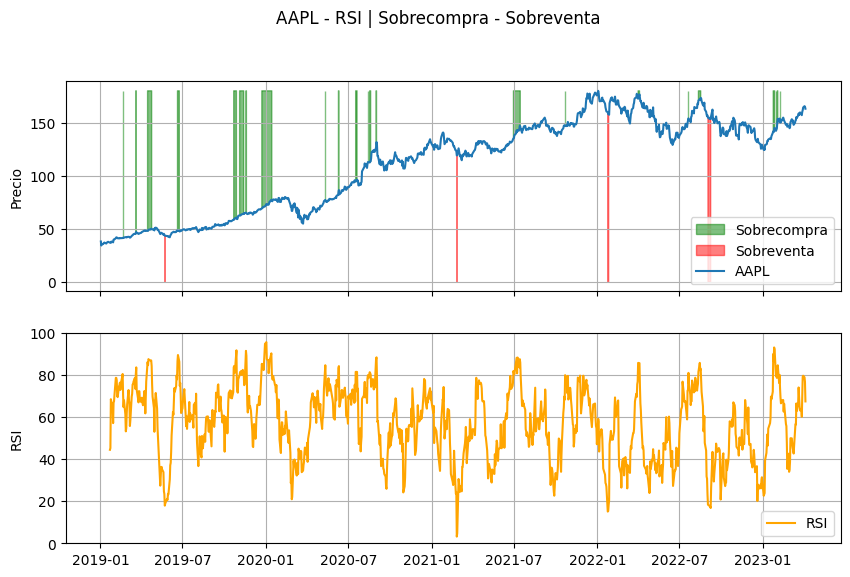

In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

#Función del calculo del RSI
def rsi(data, window=14):
    delta = data.diff()

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

#Descarga y uso de la funcion RSI
aapl = yf.download('AAPL', start='2019-01-01', end='2023-04-06')
aapl['rsi'] = rsi(aapl['Adj Close'])

# Graficar los datos de precios y el RSI
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
plt.suptitle("AAPL - RSI | Sobrecompra - Sobreventa ", y = 1)
#Pintado sobrecompra y sobreventa rsi
sobrecompra = (aapl["rsi"] >= 80)
sobreventa = (aapl["rsi"] <= 20) 

ax[0].fill_between(aapl.index, aapl["Adj Close"].max(), aapl["Adj Close"], where=sobrecompra, color="green", alpha=0.5)
ax[0].fill_between(aapl.index, aapl["Adj Close"],where=sobreventa, color="red", alpha=0.5)

ax[0].plot(aapl.index, aapl['Adj Close'])
ax[0].set_ylabel('Precio')
ax[0].grid(True)

ax[1].plot(aapl.index, aapl['rsi'], color='orange')
ax[1].set_ylabel('RSI')
ax[1].set_ylim(0, 100)
ax[1].grid(True)


ax[0].legend(["Sobrecompra","Sobreventa","AAPL","Subida de Tipos"], loc="lower right")
ax[1].legend(["RSI"], loc="lower right")
plt.show()